In [77]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [78]:
# load the dataset
x_train = np.array([
    [1500, 3, 2],
    [1600, 4, 1],
    [1200, 2, 1],
    [1800, 4, 2],
    [2200, 5, 2],
    [950, 2, 1],
    [1350, 3, 1],
    [1700, 3, 2],
    [1100, 2, 1],
    [1400, 3, 1],
])

y_train = np.array([
    300000,
    350000,
    200000,
    400000,
    550000,
    150000,
    280000,
    380000,
    180000,
    310000,
])

In [79]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[1500    3    2]
 [1600    4    1]
 [1200    2    1]
 [1800    4    2]
 [2200    5    2]]


In [80]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [300000 350000 200000 400000 550000]


In [81]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10


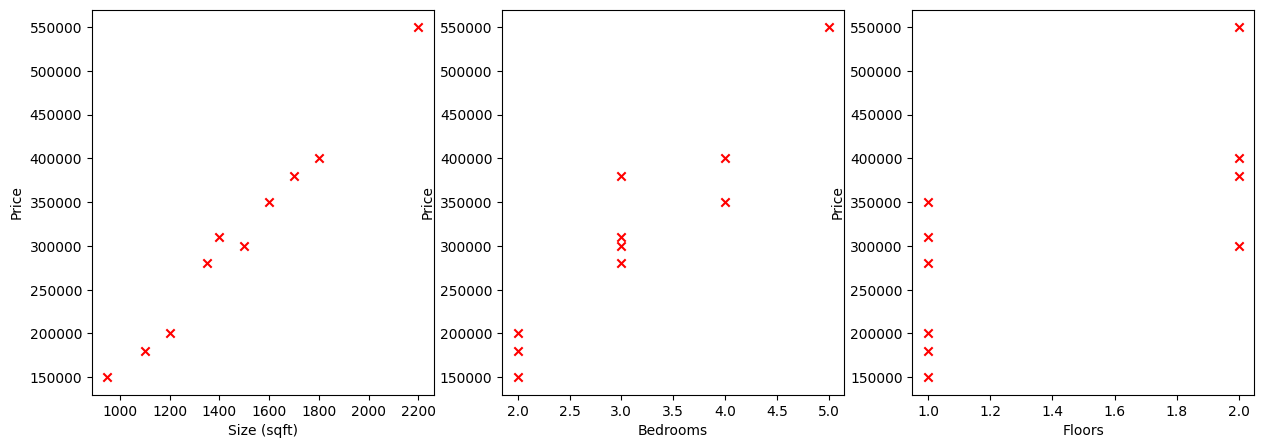

In [82]:
# Visualize the data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(x_train[:, 0], y_train, marker='x', c='r')
axes[0].set_xlabel("Size (sqft)")
axes[0].set_ylabel("Price")

axes[1].scatter(x_train[:, 1], y_train, marker='x', c='r')
axes[1].set_xlabel("Bedrooms")
axes[1].set_ylabel("Price")

axes[2].scatter(x_train[:, 2], y_train, marker='x', c='r')
axes[2].set_xlabel("Floors")
axes[2].set_ylabel("Price")

plt.show()


In [83]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    ### START CODE HERE ###
    for i in range(m):
        total_cost = total_cost + ((np.dot(w,x[i])+b)-y[i])**2
    total_cost = (1 / (2 * m)) * total_cost 
    ### END CODE HERE ### 
    return total_cost

In [84]:
def normalize_data(x, y):
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    x_normalized = (x - x_mean) / x_std
    
    y_mean = np.mean(y)
    y_std = np.std(y)
    y_normalized = (y - y_mean) / y_std
    
    return x_normalized, y_normalized

In [85]:
# Compute cost with some initial values for paramaters w, b
initial_w = [0.4,1,0.2]
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(cost)


54239581056.093994


In [86]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m,n = x.shape
    
    # You need to return the following variables correctly
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    ### START CODE HERE ###
    for i in range(m):
        fwb_i = (np.dot(w,x[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (1/m) * (fwb_i * x[i][j])
        dj_db = dj_db + (1/m) * fwb_i
    
    ### END CODE HERE ### 
    return dj_dw, dj_db

In [87]:
# Compute and display gradient with w initialized to zeroes
initial_w = [0,0,0]
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)



Gradient at initial w, b (zeros): [-4.9785e+08 -1.0620e+06 -4.7300e+05] -310000.0


In [88]:
# Compute and display cost and gradient with non-zero w
test_w = [1,0.2,0.2]
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: [-4.95536785e+08 -1.05710136e+06 -4.70798360e+05] -308518.9


In [89]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = (x.shape[0])
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [90]:
initial_w = [0.2,0.1,0.2]
initial_b = 0.

x_normalized, y_normalized = normalize_data(x_train, y_train)

# some gradient descent settings
iterations = 1500
alpha = 0.001

w,b,_,_ = gradient_descent(x_normalized ,y_normalized, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     0.17   
Iteration  150: Cost     0.10   
Iteration  300: Cost     0.06   
Iteration  450: Cost     0.04   
Iteration  600: Cost     0.03   
Iteration  750: Cost     0.03   
Iteration  900: Cost     0.02   
Iteration 1050: Cost     0.02   
Iteration 1200: Cost     0.02   
Iteration 1350: Cost     0.02   
w,b found by gradient descent: [0.44900582 0.35949486 0.22298195] -3.3441999169880657e-17


In [100]:
m,n = x_train.shape
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = np.dot(w,x_normalized[i]) + b

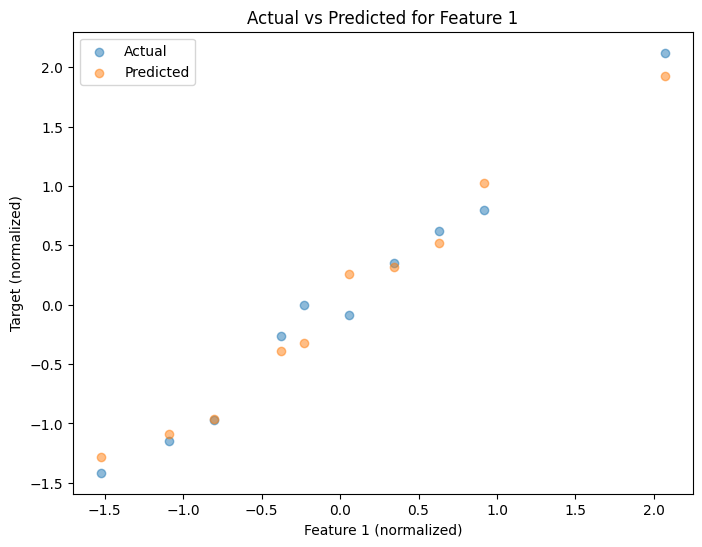

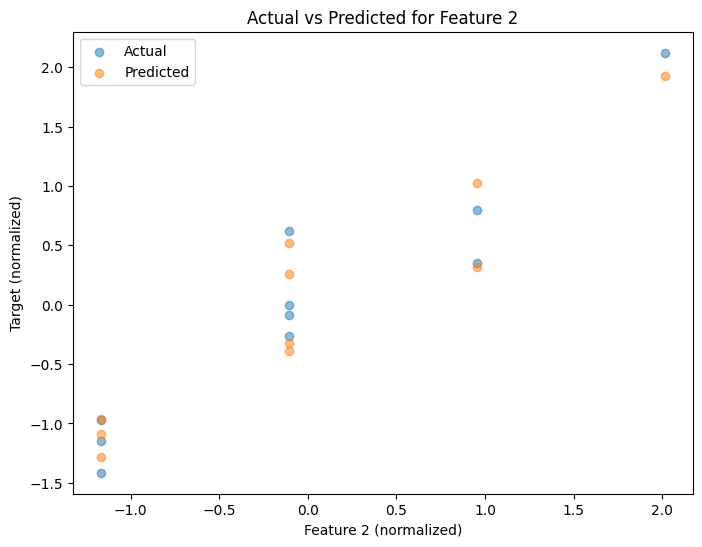

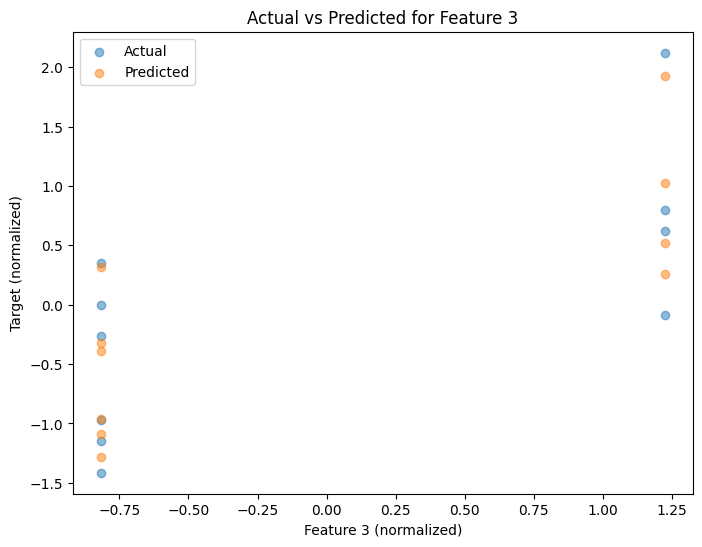

In [104]:
for i in range(n):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_normalized[:, i], y_normalized, label='Actual', alpha=0.5)
    plt.scatter(x_normalized[:, i], predicted, label='Predicted', alpha=0.5)
    plt.xlabel(f"Feature {i+1} (normalized)")
    plt.ylabel("Target (normalized)")
    plt.legend()
    plt.title(f"Actual vs Predicted for Feature {i+1}")
    plt.show()

In [111]:
x = [2000, 2, 1]
predict1 = np.dot(w,x) + b
print(f'For a house which is 2000 sqft, contains 2 bedrooms, and has 1 story, we predict a price of {predict1*100}')

x = [1600, 2, 2]
predict2 = np.dot(w,x) + b
print(f'For a house which is 1600 sqft, contains 2 bedrooms, and has 2 stories, we predict a price of {predict2*100}')


For a house which is 2000 sqft, contains 2 bedrooms, and has 1 story, we predict a price of 89895.36077903342
For a house which is 1600 sqft, contains 2 bedrooms, and has 2 stories, we predict a price of 71957.42625113954
